In [1]:
import pandas as pd
from IPython.display import display

In [3]:
df = pd.read_csv("./feature-extension/atelectasis-feature-extension.csv")

In [15]:
df.head(5)

Unnamed: 0.2  Unnamed: 0.1  Unnamed: 0           id  \
0             0           432         487  P300R901530   
1             1           568         641  P300R134725   
2             2           385         433  P300R595769   
3             3            99          99  P231R575633   
4             4           363         408  P300R243430   

                                       dicom_id  subject_id     stay_id  \
0  005aff0f-0c236062-06df954a-25ad1874-bcdffcb0    14825395  31814406.0   
1  24c9417f-d3972f1e-32aabb7a-8123fcd5-a4b15676    16611781  39028206.0   
2  7932e4ef-4c3c88d1-c495bc63-5f1b75be-1d771705    14254429  31943698.0   
3  f0358e42-f36d9497-d5b3e082-52837e1e-07bcce84    19458616  32025907.0   
4  6734422f-c3e84ec8-1af0cb63-f360c146-1fca2c1e    13880916  36731968.0   

   study_id  split  eye_tracking_data_discarded  ... chest pain  \
0  55805945  train                        False  ...      False   
1  55803695    val                        False  ...      False   
2  54176216    val                        False  ...      False   
3  54401894  train                        False  ...      False   
4  59469360   test                        False  ...      False   

   chronic obstructive pulmonary disease  cough cyanosis  fever  \
0                                  False  False    False  False   
1                                  False  False    False  False   
2                                  False  False    False  False   
3                                  False  False    False  False   
4                                  False  False    False  False   

   pleural effusion  pulmonary tuberculosis  small volume linear shadows  \
0             False                   False                        False   
1             False                   False                        False   
2             False                   False                        False   
3             False                   False                         True   
4             False                   False                        False   

   smoking                                             reason  
0    False  {'anesthesia': "because there is no mention of...  
1    False  {'anesthesia': "because there is no mention of...  
2    False  {'anesthesia': "because there is no mention of...  
3    False  {'anesthesia': 'because there is no mention of...  
4    False  {'anesthesia': 'because the report does not me...  

[5 rows x 98 columns]

In [16]:
import os
from PIL import Image

MIMIC_EYE_PATH = "F:\\mimic-eye"
# PHYSIONET_PATH = "F:\\physionet.org"


def get_report_images(x: pd.Series) -> tuple[list]:
    patient_id = x["subject_id"]
    study_id = x["study_id"]
    dicom_id = x["dicom_id"]
    # dicom_id = data['dicom_id']
    report_path = os.path.join(
        MIMIC_EYE_PATH,
        f"patient_{patient_id}",
        "CXR-DICOM",
        f"s{study_id}.txt",
    )

    report_path = os.path.join(
        MIMIC_EYE_PATH,
        f"patient_{patient_id}",
        "CXR-DICOM",
        f"s{study_id}.txt",
    )

    image_path = os.path.join(
        MIMIC_EYE_PATH,
        f"patient_{patient_id}",
        "CXR-JPG",
        f"s{study_id}",
        f"{dicom_id}.jpg",
    )

    # image_path = os.path.join(
    #     PHYSIONET_PATH,
    #     "files",
    #     "mimic-cxr-jpg",
    #     "2.0.0",
    #     "files",
    #     f"p{str(patient_id)[:2]}",
    #     f"p{patient_id}",
    #     f"s{study_id}",
    #     f"{dicom_id}.jpg",
    # )

    with open(report_path) as f:
        report = f.read()

    im = Image.open(image_path)
    return report, im

In [17]:
report, img = get_report_images(df.iloc[0])

In [18]:
print(report)

                                 FINAL REPORT
 HISTORY:  Shortness of breath and cough.
 
 TECHNIQUE:  PA and lateral views of the chest.
 
 COMPARISON:  Chest CTA ___.  Chest radiograph ___.
 
 FINDINGS:
 
 The heart size is top normal.  The mediastinal and hilar contours are within
 normal limits.  The pulmonary vascularity is normal.  The lungs are clear.  No
 pleural effusion, focal consolidation, or pneumothorax is present.  No acute
 osseous abnormalities present.
 
 IMPRESSION:
 
 No acute cardiopulmonary abnormality.



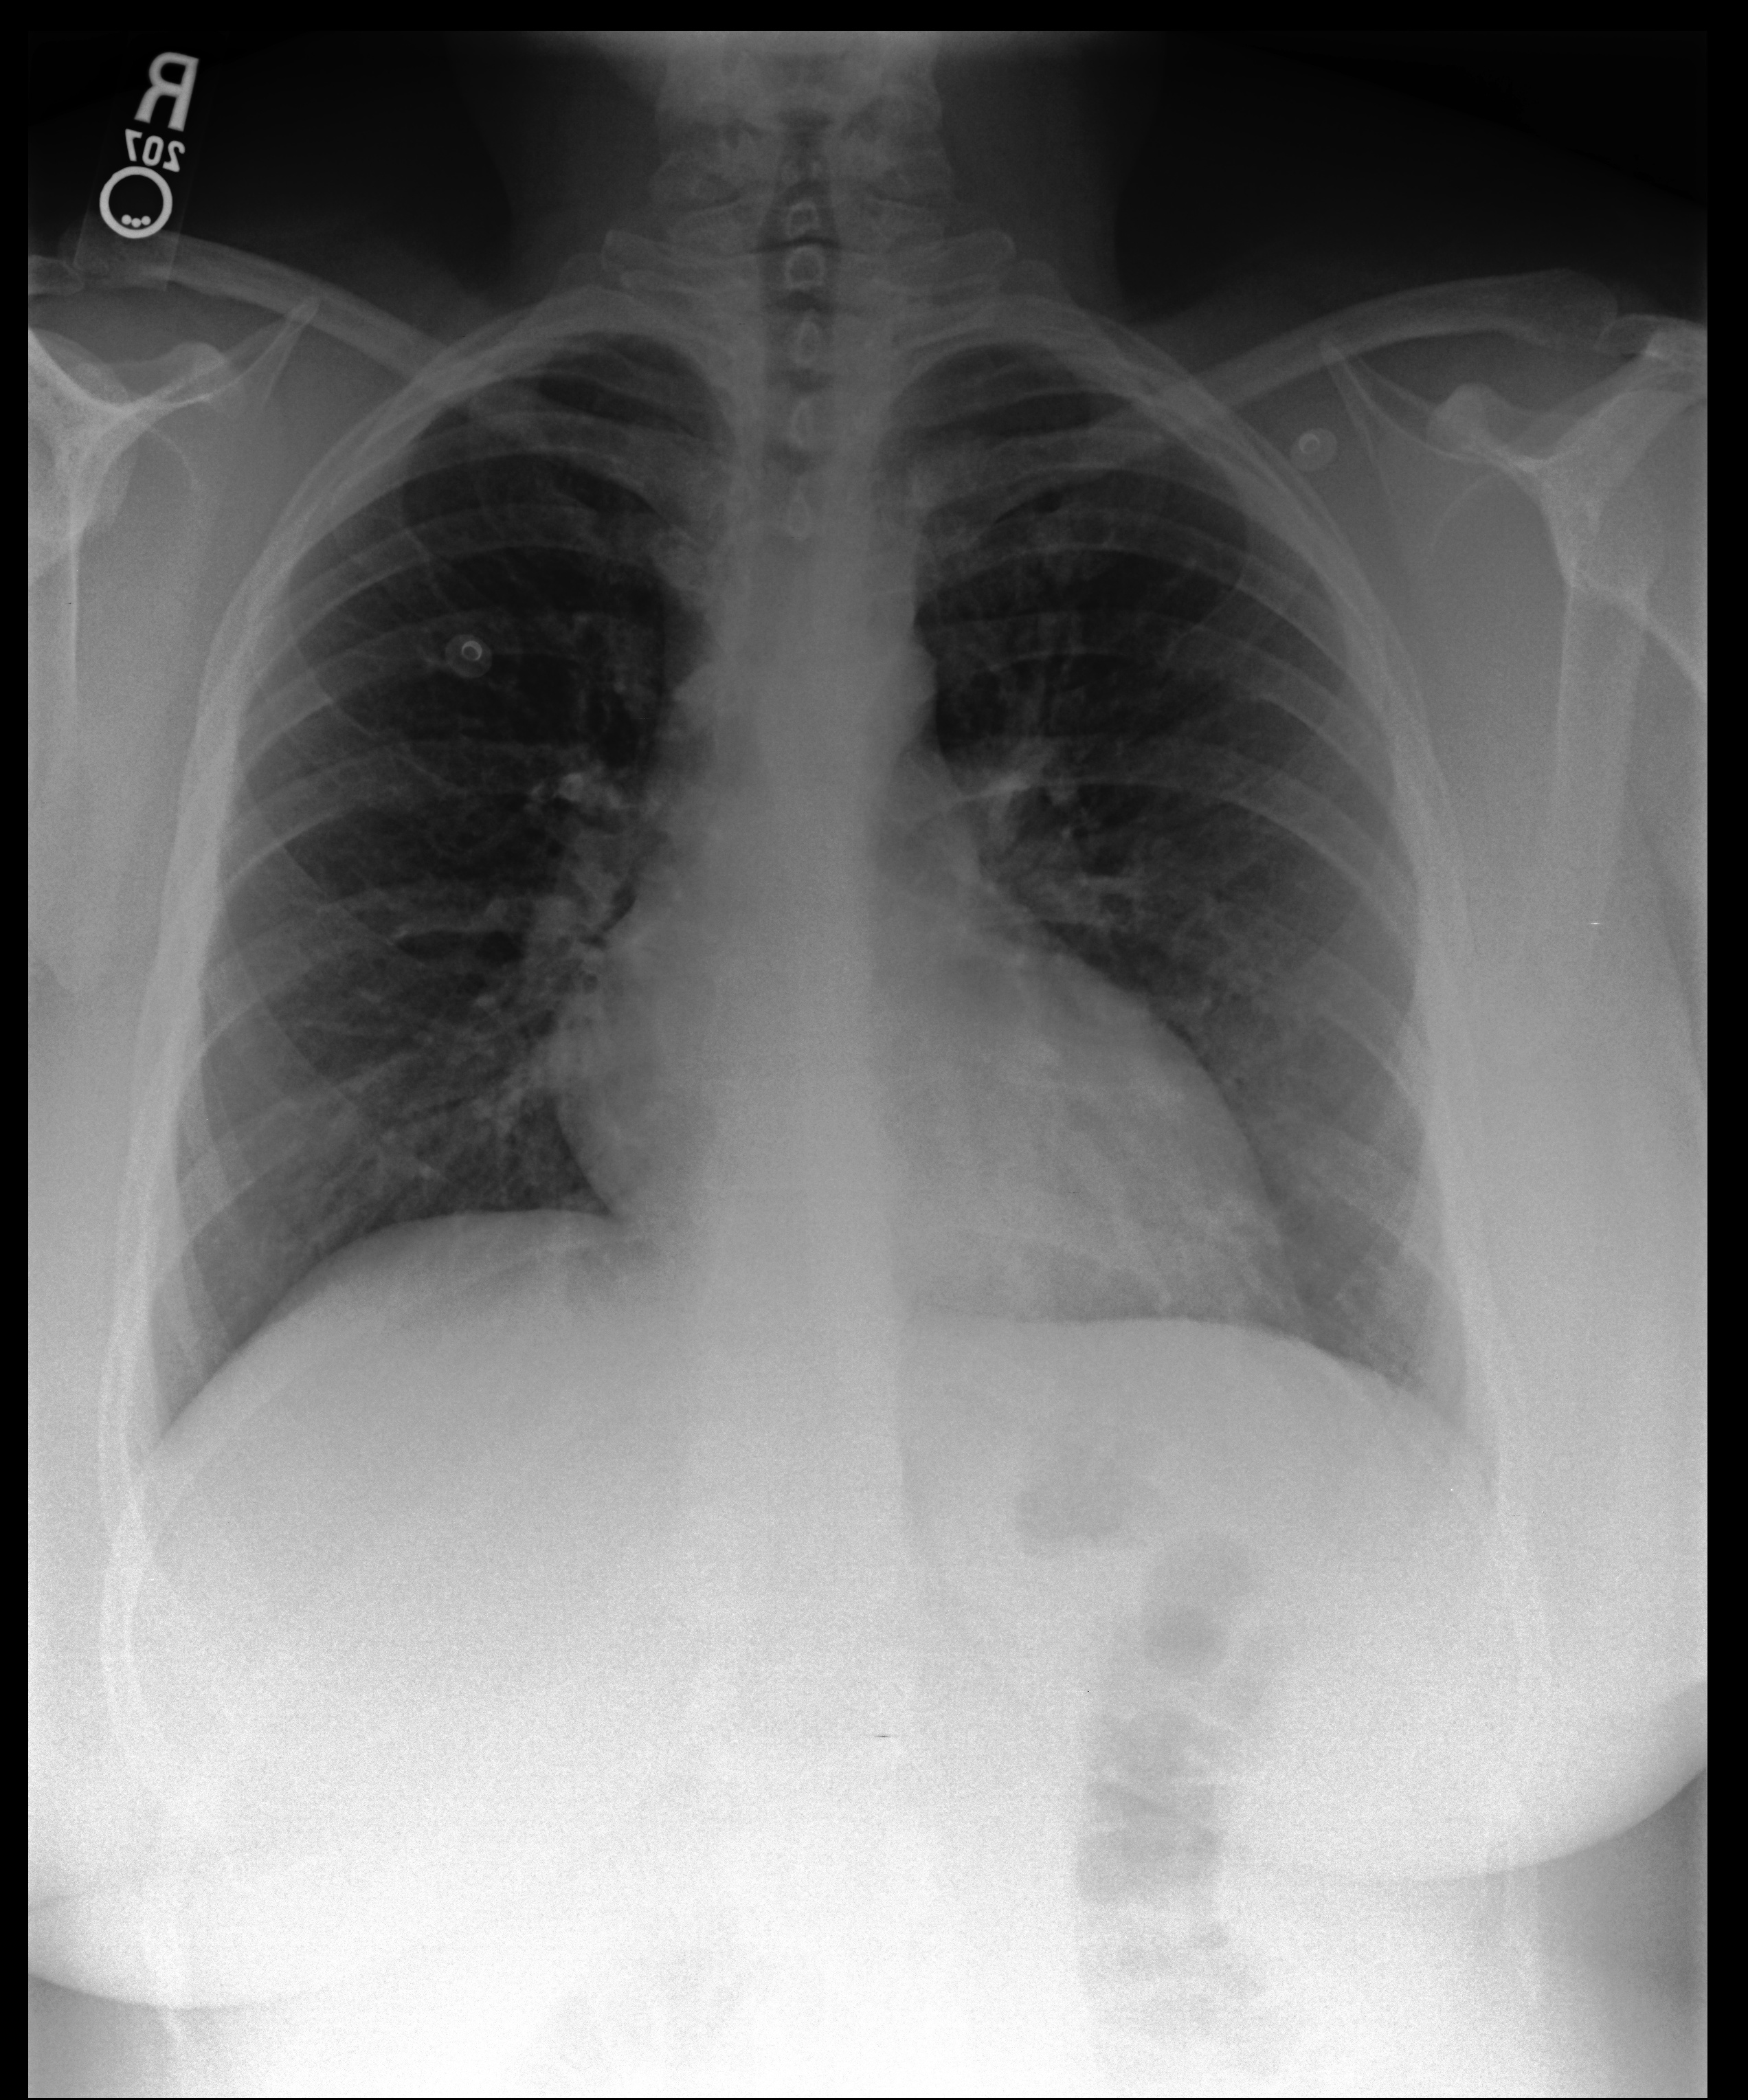

In [19]:
display(img)